In [19]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering
import cv2
 

img = cv2.imread('ready_img.jpg')
img = cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)


criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 10
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)



## K-Means

In [20]:
center = np.uint8(center)

In [21]:
res = center[label.flatten()]
result_image = res.reshape((img.shape))

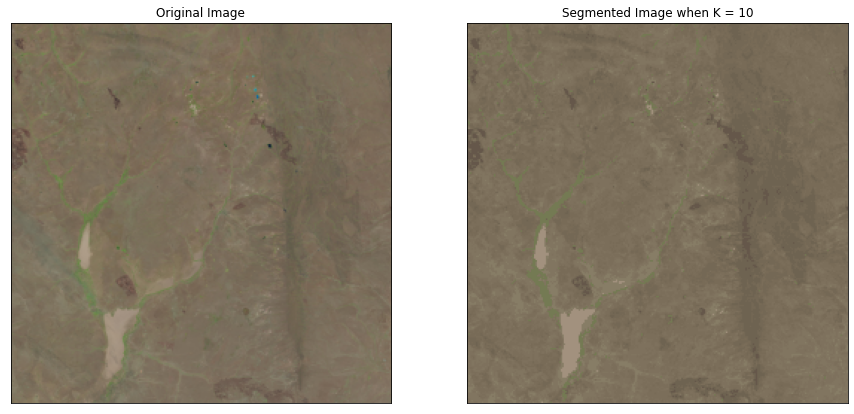

In [22]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

## Superpixels

SLIC number of segments: 375


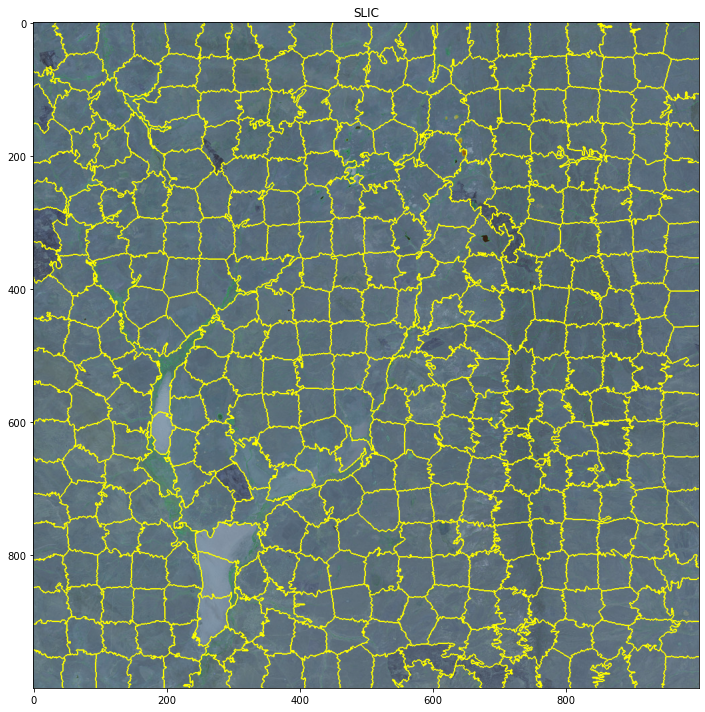

In [42]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

img = img_as_float(cv2.imread('ready_img.jpg'))

segments_slic = slic(img, n_segments=400, compactness=8, sigma=0.1,
                     start_label=1)

print(f'SLIC number of segments: {len(np.unique(segments_slic))}')



fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

plt.imshow(mark_boundaries(img, segments_slic))
plt.title('SLIC')

plt.tight_layout()
plt.show()

## Unsupervised Image Segmentation by Backpropagation by Asako Kanezaki